# Traffic on the I-94 Interstate highway.

![Imgur](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Interstate_94_map.png/1920px-Interstate_94_map.png)

source:<a href=https://en.wikipedia.org/wiki/Interstate_94> https://en.wikipedia.org/wiki/Interstate_94 </a>

## Introducction to Interstate 94 (I-94) 

Is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. 

These indicators can be weather type, time of the day, time of the week, etc. 

### INDEX <a id='0'></a>

<a href='#1'>1. The I-94 Traffic Dataset</a>

<a href='#2'>2. Analyzing Traffic Volume</a>

<a href='#3'>3. Traffic Volume: Day vs. Night</a>

<a href='#4'>4. Traffic Volume: Day vs. Night (II)</a>

<a href='#5'>5. Time Indicators</a>

<a href='#6'>6. Time Indicators (II)</a>

<a href='#7'>7. Time Indicators (III)</a>

<a href='#8'>8. Weather Indicators</a>

<a href='#9'>9. Weather Types</a>

<a href='#10'>10. Next steps:</a>

## <a id='1'>1. The I-94 Traffic Dataset</a>

In [1]:
%%html
<style>
table {float:left}
</style>


|Attribute Information: | |
|:---|:---|
| `holiday`| Categorical US National holidays plus regional holiday, Minnesota State Fair|
| `temp` | Numeric Average temp in kelvin|
|`rain_1h` | Numeric Amount in mm of rain that occurred in the hour|
|`snow_1h` |Numeric Amount in mm of snow that occurred in the hour |
| `clouds_all` |Numeric Percentage of cloud cover |
| `weather_main` |Categorical Short textual description of the current weather |
|`weather_description`| Categorical Longer textual description of the current weather|
|`date_time`| DateTime Hour of the data collected in local CST time|
|`traffic_volume` |Numeric Hourly I-94 ATR 301 reported westbound traffic volume|

In [2]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<a href='#0'> ← index </a>

## <a id='2'>2. Analyzing Traffic Volume</a>

Hourly Interstate 94 westbound traffic volume for MN DoT Station 301, approximately midway between Minneapolis and St Paul, MN. 

Hourly weather features and holidays are included to see the impact on traffic volume.

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Night and day influence on the traffic volume?

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — **this probably occurs during the night**, or when a road is under construction

- About 25% of the time, the traffic volume was four times as much (4,933 cars or more)

<a href='#0'> ← index </a>

## <a id='3'>3. Traffic Volume: Day vs. Night</a>

This possibility of night and day influencing traffic volume gives our analysis an interesting direction: 

- Comparing daytime data with nighttime data.

We will start by dividing the data set into two parts:

 - **Daytime data**: hours from 7 a.m. to 7 p.m. (12 hours).
 
 - **Nighttime data**: hours from 7 p.m. to 7 a.m. (12 hours).
 
Although this is not a perfect criterion for distinguishing between night and daytime hours, it is a good starting point.

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time']).copy() # text to datetime
traffic['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [8]:
traffic['date_time'].dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

 I extract the hours with the `datetime.hour` method to use as a Boolean filter and assign it to a variable `alles_bool`

In [9]:
alles_bool = traffic['date_time'].dt.hour
alles_bool

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

These are the values of the hours I will work with.

In [10]:
horas_alles = traffic.loc[alles_bool,'date_time'].dt.hour
horas_alles.unique()

array([18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11,
       12, 13, 14, 15, 17, 16])

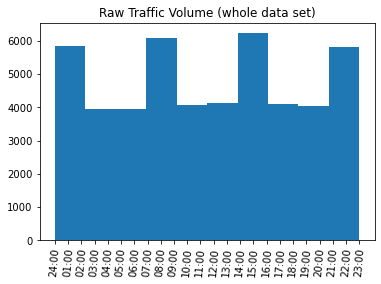

In [11]:
plt.hist(horas_alles)
plt.title('Raw Traffic Volume (whole data set)')
plt.xticks(ticks=[ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                  19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 8, 7],
           labels=[ '09:00','10:00','11:00','12:00','13:00','14:00',
                   '15:00','16:00','17:00','18:00','19:00','20:00',
                   '21:00','22:00','23:00','24:00','01:00','02:00',
                   '03:00','04:00','05:00','06:00','08:00','07:00'],
           rotation=85)
plt.show()

A histogram shows accumulation or trend, variability or dispersion and form of the distribution.

Therefore we can see the distribution of traffic volume in a day, we see three time slots where the movement of vehicles is greater:

- **Morning from 07:00 to 09:00 AM**

- **Noon from 14:00 to 16:00 PM**

- **Night from 22:00 to 01:00 AM**.

We continue with the idea of separating day and night.

## Day

We set the interval that corresponds to the hours of the day.

Establish the values that are greater than or equal to 7 and values that are less than or equal to 19. There we will have the interval that corresponds to the daytime hours.

In [12]:
day_bool = (traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour <=19)

In [13]:
horas_daytime = traffic.loc[day_bool,'date_time'].dt.hour
horas_daytime.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8,  7])

In [14]:
horas_daytime

0         9
1        10
2        11
3        12
4        13
         ..
48195    15
48196    16
48197    17
48198    18
48199    19
Name: date_time, Length: 25838, dtype: int64

In [15]:
traffic_daytime = traffic[day_bool].copy()
traffic_daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


## Night

We do the same operation with the hours that correspond to those of the night.

In [16]:
night_bool = (traffic['date_time'].dt.hour >=19) | (traffic['date_time'].dt.hour <=7)

In [17]:
horas_nighttime = traffic.loc[night_bool,'date_time'].dt.hour
horas_nighttime.unique()

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7])

In [18]:
#traffic_night = traffic[night_bool].copy()
traffic_night = traffic[night_bool].copy()
traffic_night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


<a href='#0'> ← index </a>

## <a id='4'>4. Traffic Volume: Day vs. Night (II)</a>

Now we're going to compare the distribution on traffic volume at night and during day.

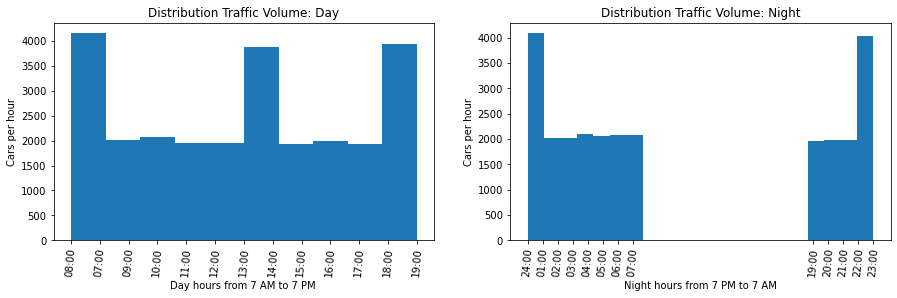

In [19]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)

plt.hist(horas_daytime)
plt.xlabel('Day hours from 7 AM to 7 PM ')
plt.ylabel('Cars per hour')
plt.title('Distribution Traffic Volume: Day')
plt.xticks(ticks=[ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  7,  8],
           labels=[ '09:00','10:00','11:00','12:00','13:00','14:00',
                   '15:00','16:00','17:00','18:00','19:00','08:00','07:00'
                  ],
           rotation=85)
plt.subplot(1,2,2)

bins = 'auto'

plt.hist( horas_nighttime, bins)
plt.xlabel('Night hours from 7 PM to 7 AM')
plt.ylabel('Cars per hour')
plt.title('Distribution Traffic Volume: Night')
plt.xticks(ticks=[ 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7 ],
           labels=['19:00', '20:00', '21:00', '22:00', '23:00', '24:00','01:00','02:00','03:00','04:00',
                   '05:00','06:00','07:00' ],
           rotation=85)
plt.show()

In [20]:
traffic_daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,25838.000000,25838.000000,25838.000000,25838.000000,25838.000000
mean,282.347796,0.502320,0.000234,53.040135,4649.292360
std,13.302562,61.167614,0.008511,37.590946,1202.321987
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.720000,0.000000,0.000000,5.000000,4021.000000
50%,283.867000,0.000000,0.000000,75.000000,4736.000000
75%,293.610000,0.000000,0.000000,90.000000,5458.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [21]:
traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,26406.000000,26406.000000,26406.000000,26406.000000,26406.000000
mean,280.041662,0.142964,0.000181,46.043021,2018.015375
std,13.312483,1.131005,0.007148,39.995392,1713.201969
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.600000,0.000000,0.000000,1.000000,581.000000
50%,281.280000,0.000000,0.000000,40.000000,1485.000000
75%,290.550000,0.000000,0.000000,90.000000,2934.000000
max,307.680000,55.630000,0.510000,100.000000,7260.000000


## Analized results:

We can observe in greater detail, the time slots mentioned above, we see how from 6 am traffic begins to increase until 8 am to reduce the volume in half until 13 noon where it increases again until 14 pm to reduce the volume again and again increase traffic to coincide with the end of the working day and the return home that lasts until 01 am.

We also see that the volume of vehicles at night is much lower than during the day, although there are occasional moments when the return home causes the volume to increase significantly for a short period of time.  The rest of the time the volume is much lower.

<a href='#0'> ← index </a>

## <a id='5'>5. Time Indicators</a>

Previously, we determined that the traffic at night is generally light. 

Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

#### - Month

#### - Day of the week

#### - Time of day

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method.

## - Monthly

In [22]:
traffic_daytime['month_day'] = traffic_daytime['date_time'].dt.month
by_month_day = traffic_daytime.groupby('month_day').mean()
by_month_day['traffic_volume']

month_day
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

Generating a line plot to visualize how the traffic volume changed each month on average.

Analyze the line plot. 

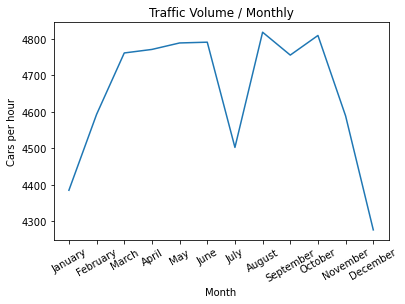

In [23]:
plt.plot(by_month_day['traffic_volume'])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6,7,8,9,10,11,12],
           labels=['January', 'February', 'March','April',
                   'May','June', 'July','August','September', 'October', 'November','December'],
           rotation=30)

plt.xlabel('Month')
plt.ylabel('Cars per hour')
plt.title('Traffic Volume / Monthly')

plt.show()

It seems that the volume of traffic is more focused on certain months of the year, except for the coldest months and the month of July, which seems to be the month most Americans choose as their vacation month.

<a href='#0'> ← index </a>

## <a id='6'>6. Time Indicators (II)</a>

In the previous screen, we generated a line plot showing how the traffic volume changed each month on average.

We'll now continue with building line plots for another time unit: 

## Day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code:

In [24]:
traffic_daytime['dayofweek'] = traffic_daytime['date_time'].dt.dayofweek
by_dayofweek = traffic_daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

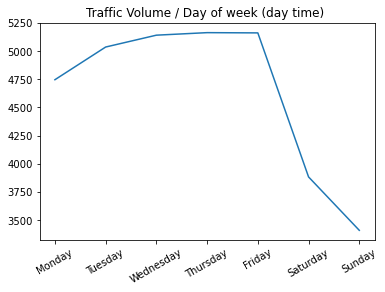

In [25]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic Volume / Day of week (day time) ')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=[ 'Monday', 'Tuesday',
                                                'Wednesday', 'Thursday', 
                                                'Friday', 'Saturday','Sunday'],
           rotation=30) 
plt.show()

It seems that the road is busier on weekdays than on weekends.

<a href='#0'> ← index </a>

## <a id='7'>7. Time Indicators (III)</a>

We found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll now generate a line plot for the time of day. 

The weekends, however, will drag down the average values, so we're going to look at the averages separately.

To do that, we'll start by **splitting the data based on the day type**: 

**- business day or weekend.**

Below, we show you how to split the dataset so you can focus on plotting the graphs. While your variable names may vary, the logic of the code should be the same.

In [26]:
# Splitting Data

traffic_daytime['hour_day'] = traffic_daytime['date_time'].dt.hour                 # Filtering days
bussiness_days = traffic_daytime.copy()[traffic_daytime['dayofweek'] <= 4]         # 4 <= Friday
weekend = traffic_daytime.copy()[traffic_daytime['dayofweek'] >= 5]                # 5 >= Saturday

by_hour_business = bussiness_days.groupby('hour_day').mean()                       
by_hour_weekend = weekend.groupby('hour_day').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour_day
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour_day
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


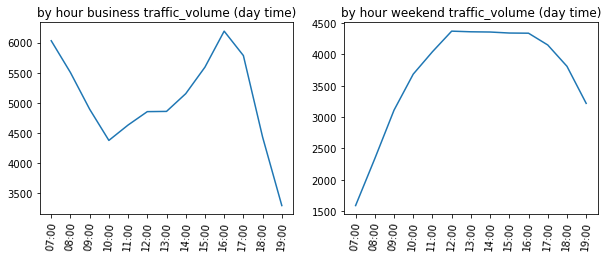

In [27]:
plt.figure(figsize=(10, 12))

plt.ylim([0, 24])
plt.subplot(3, 2, 1)
plt.title('by hour business traffic_volume (day time)')
plt.plot(by_hour_business['traffic_volume'])
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18,19,],
           labels=['07:00','08:00','09:00','10:00','11:00',
                   '12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00'],
           rotation=85)

plt.subplot(3, 2, 2)
plt.title('by hour weekend traffic_volume (day time)')
plt.plot(by_hour_weekend['traffic_volume'])
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18,19,],
           labels=['07:00','08:00','09:00','10:00','11:00',
                   '12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00'],
           rotation=85)

plt.show()



### Summary

- According to what has been seen so far the Road use appears to have a direct relationship with weekday work schedules and therefore the increased frequency of vehicles per hour passing by and the volumen may cause some kind of jam.


- Hoewer the Weekend use is much more progressive and there does not seem to be anything related to work schedules that sets the tempo of use, and the volume of vehicles is also lower compared with the weekday work.

<a href='#0'> ← index </a>

## <a id='8'>8. Weather Indicators</a>

In [28]:
# conversion from Fahrenheit to Celsius.
def K_to_C(K):
    return (K - 273.15)

In [29]:
traffic_daytime.corr()['traffic_volume'].sort_values(ascending = False)

traffic_volume    1.000000
temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
hour_day         -0.007369
month_day        -0.017397
clouds_all       -0.033410
dayofweek        -0.371023
Name: traffic_volume, dtype: float64

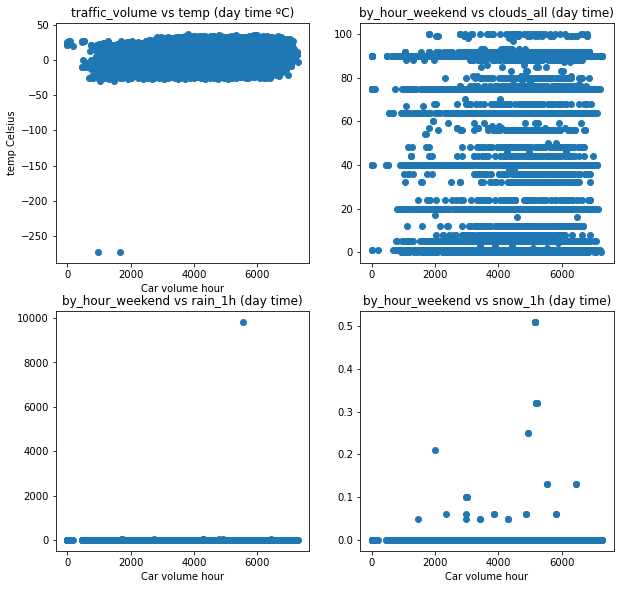

In [30]:
plt.figure(figsize=(10, 15))
plt.ylim([0, 24])

plt.subplot(3, 2, 1)
plt.title('traffic_volume vs temp (day time ºC)')
plt.scatter(traffic_daytime['traffic_volume'],K_to_C(traffic_daytime['temp']))

plt.xlabel('Car volume hour')
plt.ylabel('temp Celsius')

plt.subplot(3, 2, 2)
plt.title('by_hour_weekend vs clouds_all (day time)')
plt.scatter(traffic_daytime['traffic_volume'],traffic_daytime['clouds_all'])

plt.subplot(3, 2, 3)
plt.title('by_hour_weekend vs rain_1h (day time)')
plt.scatter(traffic_daytime['traffic_volume'],traffic_daytime['rain_1h'])

plt.xlabel('Car volume hour')

plt.subplot(3, 2, 4)
plt.title('by_hour_weekend vs snow_1h (day time)')
plt.scatter(traffic_daytime['traffic_volume'],traffic_daytime['snow_1h'])

plt.xlabel('Car volume hour')

plt.show()

The use of scatter charts does not appear that any of these warn any reduction or increase in traffic due to variations in temperature, cloud, rain or snow.

<a href='#0'> ← index </a>

## <a id='9'>9. Weather Types</a>

Previously, we examined the correlation between `traffic_volume` and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: 

`weather_main ` and ` weather_description`

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

In [31]:
by_weather_main_day = traffic_daytime.groupby('weather_main').mean()
by_weather_description_day = traffic_daytime.groupby('weather_description').mean()

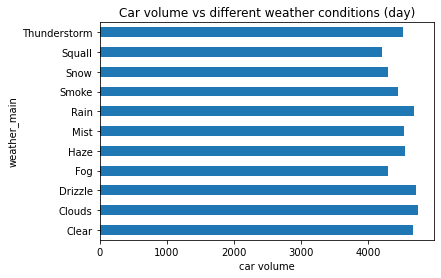

In [32]:
by_weather_main_day['traffic_volume'].plot.barh()
plt.title('Car volume vs different weather conditions (day)')
plt.xlabel('car volume')
plt.show()

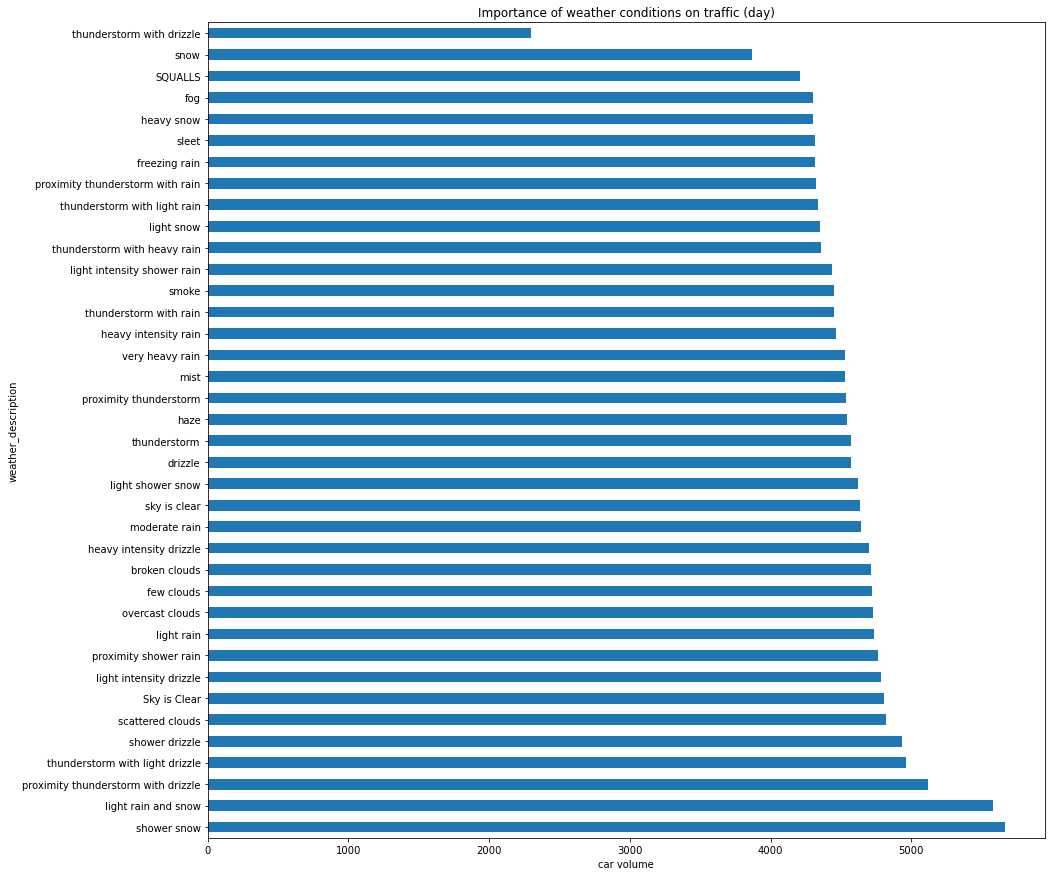

In [33]:
plt.figure(figsize=(15,15))

A = by_weather_description_day['traffic_volume'].sort_values(ascending = False)
A.plot.barh()
plt.title('Importance of weather conditions on traffic (day)')
plt.xlabel('car volume')
plt.show()

There's traffic volume exceeding 5,000 cars 

- shower snow
- light rain and snow
- proximity thunderstorm with drizzle
- thunderstorm with light drizzle
- shower drizzle

Shower snow is the weather in which the highest number of vehicles per day crosses the freeway.


Anything other than the above are situations where the volume of traffic on the freeway begins to be reduced.

<a href='#0'> ← index </a> -

### Summary

### Time indicators for the day:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

- The traffic is heavier on business days compared to the weekends.

- On business days, the rush hours are around 7 AM and 16 PM.

### Weather indicators:

- When shower snow, light rain and snow proximity thunderstorm with drizzle are over the highway, the volume of cars is reduced with a tendency towards 5000 vehicles per hour.

- The most influential weather event on the freeway is a drizzle storm, which causes the freeway usage to drop to below 2500 vehicles per hour.

<a href='#0'> ← index </a> -

## <a id='10'>10. Beyond the day:</a>

- Use the nighttime data to look for heavy traffic indicators.

- Find more time and weather indicators.

In [34]:
traffic_night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [35]:
traffic_night['month_night'] = traffic_night['date_time'].dt.month

In [36]:
traffic_night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month_night
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,10
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,10
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,10
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,10
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,10
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9


In [37]:
traffic_night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26406 entries, 10 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              26406 non-null  object        
 1   temp                 26406 non-null  float64       
 2   rain_1h              26406 non-null  float64       
 3   snow_1h              26406 non-null  float64       
 4   clouds_all           26406 non-null  int64         
 5   weather_main         26406 non-null  object        
 6   weather_description  26406 non-null  object        
 7   date_time            26406 non-null  datetime64[ns]
 8   traffic_volume       26406 non-null  int64         
 9   month_night          26406 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.2+ MB


### Monthly night.

In [38]:
by_month_night = traffic_night.groupby('month_night').mean() # agrupa columnas con valores numéricos en 12 meses  
by_month_night

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month_night,,,,,
1,264.321445,0.009327,0.000737,52.707418,1842.462454
2,264.254128,0.000656,0.000000,47.299432,1961.179659
3,271.785575,0.008316,0.000000,53.221698,2055.475943
4,277.667806,0.065497,0.000000,56.399577,2036.222833
5,286.851186,0.111038,0.000000,47.032685,2083.808440
6,291.926656,0.263865,0.000000,37.954413,2186.719205
7,293.613595,0.352343,0.000000,30.957083,2064.510824
8,291.949263,0.381950,0.000000,33.612422,2154.896894
9,289.802247,0.293499,0.000000,37.035228,2049.581963


In [39]:
by_month_night['traffic_volume']

month_night
1     1842.462454
2     1961.179659
3     2055.475943
4     2036.222833
5     2083.808440
6     2186.719205
7     2064.510824
8     2154.896894
9     2049.581963
10    2071.930059
11    1905.199010
12    1782.938694
Name: traffic_volume, dtype: float64

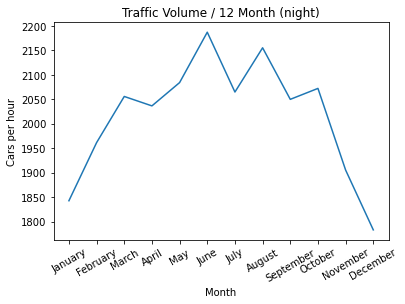

In [40]:
plt.plot(by_month_night['traffic_volume'])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6,7,8,9,10,11,12],
           labels=['January', 'February', 'March','April',
                   'May','June', 'July','August','September', 'October', 'November','December'],
           rotation=30)

plt.xlabel('Month')
plt.ylabel('Cars per hour')
plt.title('Traffic Volume / 12 Month (night)')

plt.show()

the volume of vehicles at night is lower and is centered mainly in the warmer months of the calendar, except for the months of July, mid-March and mid-September

### Day of week

In [41]:
traffic_night['dayofweek'] = traffic_night['date_time'].dt.dayofweek
traffic_night['dayofweek']

10       1
11       1
12       1
13       1
14       1
        ..
48199    6
48200    6
48201    6
48202    6
48203    6
Name: dayofweek, Length: 26406, dtype: int64

In [42]:
by_nightofweek = traffic_night.groupby('dayofweek').mean()
by_nightofweek

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month_night
dayofweek,,,,,,
0,280.497913,0.172925,0.000625,48.163934,2050.911527,6.418423
1,280.222801,0.171857,0.000201,47.576222,2177.733157,6.475297
2,280.052430,0.086390,0.000132,46.077860,2226.625530,6.516684
3,280.140999,0.181119,0.000054,48.292369,2325.003213,6.441767
4,279.585562,0.074336,0.000243,44.097281,2370.610874,6.467484
5,279.941222,0.113999,0.000000,42.796415,1660.116640,6.528357
6,279.839402,0.199190,0.000000,45.235372,1316.300768,6.539052


In [43]:
by_nightofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    2050.911527
1    2177.733157
2    2226.625530
3    2325.003213
4    2370.610874
5    1660.116640
6    1316.300768
Name: traffic_volume, dtype: float64

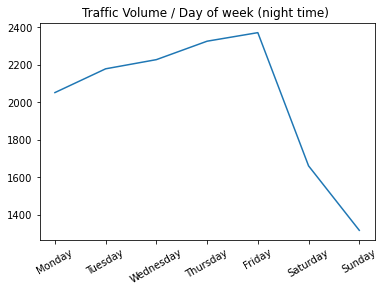

In [44]:
plt.plot(by_nightofweek['traffic_volume'])
plt.title('Traffic Volume / Day of week (night time) ')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=[ 'Monday', 'Tuesday',
                                                'Wednesday', 'Thursday', 
                                                'Friday', 'Saturday','Sunday'],
                      rotation=30)
plt.show()

We see how during the week the volume increases and when the weekend arrives again the traffic volume drops again.

In [45]:
traffic_night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month_night,dayofweek
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,10,1
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,10,1
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,10,1
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,10,1
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,10,1
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,6


In [46]:
traffic_night['hour_night'] = traffic_night['date_time'].dt.hour

bussiness_night = traffic_night.copy()[traffic_night['dayofweek'] <= 4] # 4 == Friday
weekend_night = traffic_night.copy()[traffic_night['dayofweek'] >= 5] # 5 == Saturday

by_hour_business_night = bussiness_night.groupby('hour_night').mean()
by_hour_weekend_night = weekend_night.groupby('hour_night').mean()
by_hour_business_night = bussiness_night.groupby('hour_night').mean()

print(by_hour_business_night['traffic_volume'])
print(by_hour_weekend_night['traffic_volume'])

hour_night
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour_night
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


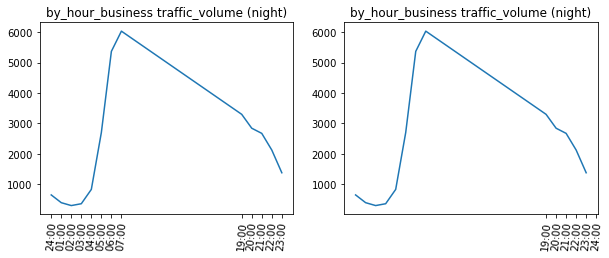

In [47]:
plt.figure(figsize=(10, 12))

plt.ylim([0, 24])

plt.subplot(3, 2, 1)
plt.title('by_hour_business traffic_volume (night)')
plt.plot(by_hour_business_night['traffic_volume'])
plt.xticks(ticks=[0, 1, 2,3,4,5,6,7,19,20,21,22,23],
           labels=['24:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00','07:00','19:00','20:00','21:00','22:00','23:00'],
           rotation=85)

plt.subplot(3, 2, 2)
plt.title('by_hour_business traffic_volume (night)')
plt.plot(by_hour_business_night['traffic_volume'])
plt.xticks(ticks=[19,20,21,22,23,24],
           labels=['19:00','20:00','21:00','22:00','23:00','24:00'],
           rotation=85)

plt.show()

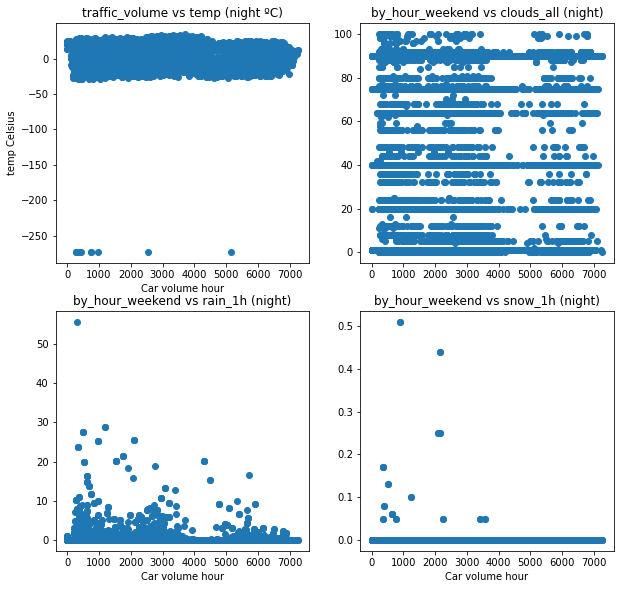

In [48]:
plt.figure(figsize=(10, 15))

plt.ylim([0, 24])

plt.subplot(3, 2, 1)
plt.title('traffic_volume vs temp (night ºC)')
plt.scatter(traffic_night['traffic_volume'],K_to_C(traffic_night['temp']))

plt.xlabel('Car volume hour')
plt.ylabel('temp Celsius')

plt.subplot(3, 2, 2)
plt.title('by_hour_weekend vs clouds_all (night)')
plt.scatter(traffic_night['traffic_volume'],traffic_night['clouds_all'])

plt.subplot(3, 2, 3)
plt.title('by_hour_weekend vs rain_1h (night)')
plt.scatter(traffic_night['traffic_volume'],traffic_night['rain_1h'])

plt.xlabel('Car volume hour')

plt.subplot(3, 2, 4)
plt.title('by_hour_weekend vs snow_1h (night)')
plt.scatter(traffic_night['traffic_volume'],traffic_night['snow_1h'])

plt.xlabel('Car volume hour')

plt.show()

In the same way that happened during the day not appear that any of these warn any reduction or increase in traffic due to variations in temperature, cloud, rain or snow.

Againn and to see if we can find more useful data, we'll look next at the categorical weather-related columns: 

`weather_main ` and ` weather_description`

We're going to calculate the average traffic volume associated with each unique value in these two columns: 

In [49]:
by_weather_main_night = traffic_night.groupby('weather_main').mean()
by_weather_description_night = traffic_night.groupby('weather_description').mean()

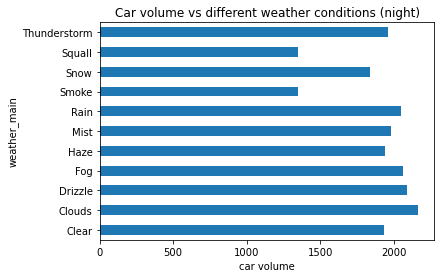

In [50]:
by_weather_main_night['traffic_volume'].plot.barh()

plt.title('Car volume vs different weather conditions (night)')
plt.xlabel('car volume')
plt.show()

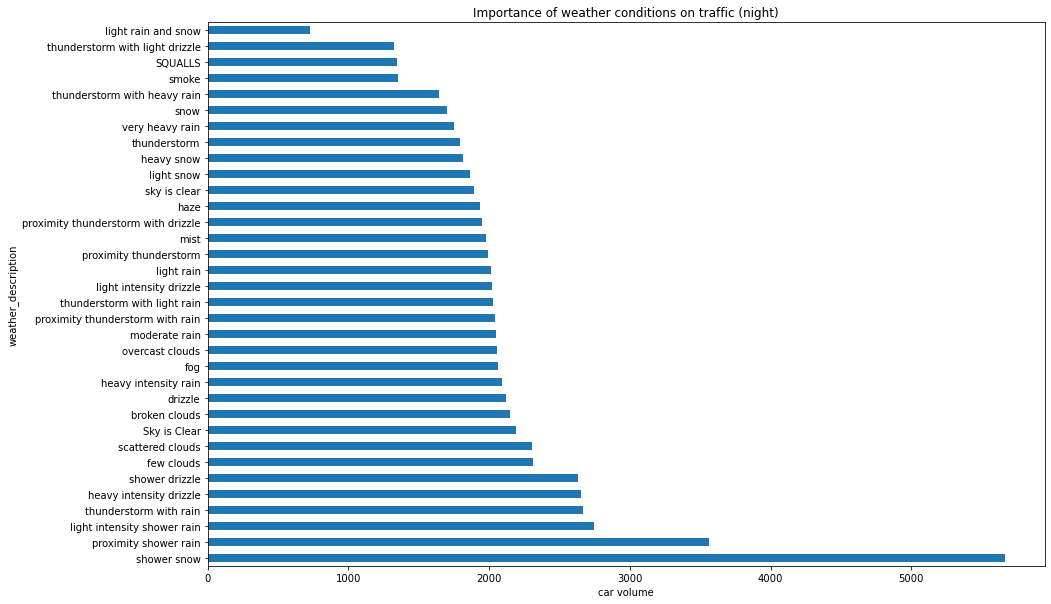

In [51]:
plt.figure(figsize=(15,10))
A = by_weather_description_night['traffic_volume'].sort_values(ascending = False)

A.plot.barh()
plt.title('Importance of weather conditions on traffic (night)')
plt.xlabel('car volume')
plt.show()

In [52]:
by_weather_description_day.corr()['traffic_volume'].sort_values(ascending = False)

traffic_volume    1.000000
rain_1h          -0.011322
clouds_all       -0.105634
temp             -0.124577
hour_day         -0.175307
snow_1h          -0.237064
dayofweek        -0.322098
month_day        -0.323839
Name: traffic_volume, dtype: float64

### observation: 

We can affirm that there is a correlation between the volume of traffic and some of the elements described in `weather_description`for the day:

These indicators show us the importance (from bottom to top) that these meteorological phenomena have in the volume of traffic

For example a rainy day will have less relevance than for example a specific day of the month.

In [53]:
by_weather_description_day['month_day'].sort_values(ascending = False)

weather_description
light shower snow                      9.545455
thunderstorm with drizzle              9.000000
proximity thunderstorm with drizzle    8.500000
thunderstorm with light drizzle        8.000000
very heavy rain                        7.625000
heavy intensity drizzle                7.600000
Sky is Clear                           7.557235
light rain and snow                    7.500000
drizzle                                7.167203
thunderstorm                           7.129630
heavy intensity rain                   7.122449
thunderstorm with rain                 7.095238
proximity thunderstorm                 7.061947
light intensity drizzle                7.006525
sleet                                  7.000000
proximity thunderstorm with rain       7.000000
SQUALLS                                7.000000
moderate rain                          6.952214
proximity shower rain                  6.894309
smoke                                  6.846154
thunderstorm with li

In [54]:
by_weather_description_night.corr()['traffic_volume'].sort_values(ascending = False)

traffic_volume    1.000000
hour_night        0.181348
dayofweek         0.137449
clouds_all        0.134572
month_night      -0.096927
snow_1h          -0.106456
rain_1h          -0.139594
temp             -0.150378
Name: traffic_volume, dtype: float64

On the other hand at night what most influences the volume of traffic is the time at night, instead the temperature causes the car volume to decrease.

In [55]:
top_badweather_day = by_weather_description_day['traffic_volume'].sort_values()

In [56]:
top_badweather_night = by_weather_description_night['traffic_volume'].sort_values()

In [57]:
df_day = pd.DataFrame(top_badweather_day) # ya es una serie no un diccionario como en Ebay
df_day.rename({'traffic_volume':'traffic_volume_day'}, axis=1, inplace=True)

df_night = pd.DataFrame(top_badweather_night)
df_night.rename({'traffic_volume':'traffic_volume_night'}, axis=1, inplace=True)

df = pd.concat([df_night,df_day],axis =1, sort=True )
df

,traffic_volume_night,traffic_volume_day
weather_description,,
SQUALLS,1345.333333,4211.000000
Sky is Clear,2194.748680,4802.848812
broken clouds,2151.017673,4715.715045
drizzle,2122.270936,4572.176849
few clouds,2311.614699,4720.890763
fog,2059.903276,4298.933511
freezing rain,NaN,4314.000000
haze,1937.946996,4545.434932
heavy intensity drizzle,2651.800000,4696.533333


Daytime and nighttime weather conditions and how they affect traffic

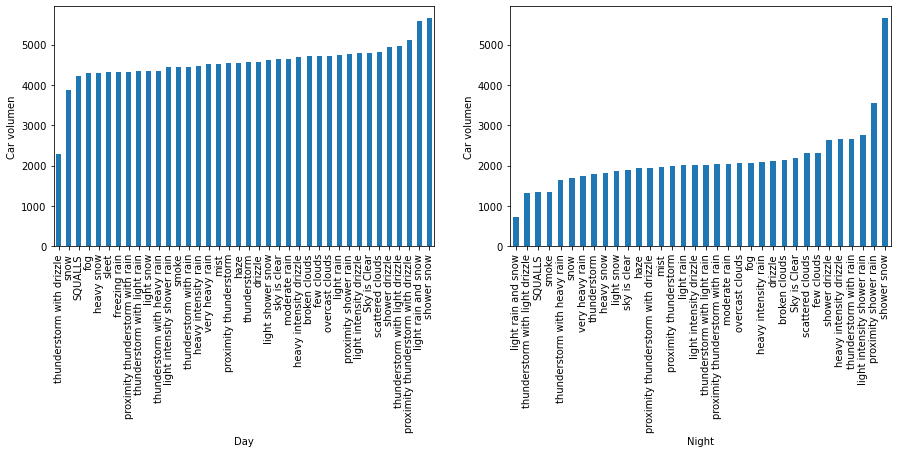

In [58]:
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1) 
A = by_weather_description_day['traffic_volume'].sort_values()
A.plot.bar()
plt.ylabel('Car volumen')
plt.xlabel('Day')

plt.subplot(3, 2, 2)
B = by_weather_description_night['traffic_volume'].sort_values()
B.plot.bar()
plt.ylabel('Car volumen')
plt.xlabel('Night')

plt.show()

In [59]:
%%html
<style>
table {float:left}
</style>

## Conclusions:


| **Most Traffic** | **Frequency Month**    | **Laboral hours** | **Weekend hours** | 
| :---         |  :---              | :---           | :---          | 
| **Day time**     | Feb-May / Aug-Oct  | 07:00-09:00   | 11:00-15:00    | 
| **Night time**   | May-June / Jul-Aug | 04:00-07:00   | 05:00-07:00    | 

It's remarkable how light rain and snow at night is responsible for the minimal traffic on the highway and that the same meteorological circumstance during the day is the second last in importance when it comes to taking the vehicle. 

The months of the year, the days of the week, working days or holidays and weather phenomena, are facts that determine the use of the highway.


However, and after the comparison between day and night, the lack of visibility is a fact that should not be ignored, as the combination of the aforementioned atmospheric phenomena and nighttime dramatically reduces the volume of cars on the highway.


<a href='#0'> ← index </a> -